In [4]:
#import sys
#sys.path.append('D:/v1ktop/Drive/REPOS/augmentation_ap/')

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [7]:
#%matplotlib notebook
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
import numpy as np
from sklearn.decomposition import PCA

In [8]:
! ls drive/My\ Drive/Models

glove.42B.300d.txt


In [9]:
glove_dir= "drive/My Drive/Models/glove.42B.300d.txt"

In [10]:
#glove_dir="D:\Models\glove\glove.twitter.27B\glove.twitter.27B.200d.txt"

In [11]:
word2vec_glove_file = get_tmpfile("glove300.txt")
glove2word2vec(glove_dir, word2vec_glove_file)
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [18]:
 %matplotlib inline
def display_pca_scatterplot(model, words=None, sample=0):
  

    word_vectors = np.array([model[w[0]] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    beingsaved = plt.figure(figsize=(6,6), dpi=300)
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x-0.3, y+0.05, word[1])
    beingsaved.savefig("analogia.png", format="png")

In [13]:
model.most_similar_cosmul(["cry", "frustrated"], ["depressed" ], 10)

[('cries', 0.9592544436454773),
 ('shout', 0.9235687851905823),
 ('yell', 0.9164627194404602),
 ('scream', 0.9146785736083984),
 ('crying', 0.899738073348999),
 ('screaming', 0.8857455849647522),
 ('angry', 0.8847301006317139),
 ('cried', 0.8803358674049377),
 ('hear', 0.8803219199180603),
 ('complain', 0.8750767111778259)]

In [14]:
model.similar_by_word("cry")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('crying', 0.7537394762039185),
 ('scream', 0.7447887659072876),
 ('cries', 0.7434192895889282),
 ('cried', 0.6671997904777527),
 ('laugh', 0.6579652428627014),
 ('shout', 0.6541374921798706),
 ('hear', 0.6471341848373413),
 ('tears', 0.636864185333252),
 ('wanna', 0.6204661726951599),
 ('sing', 0.6153764128684998)]

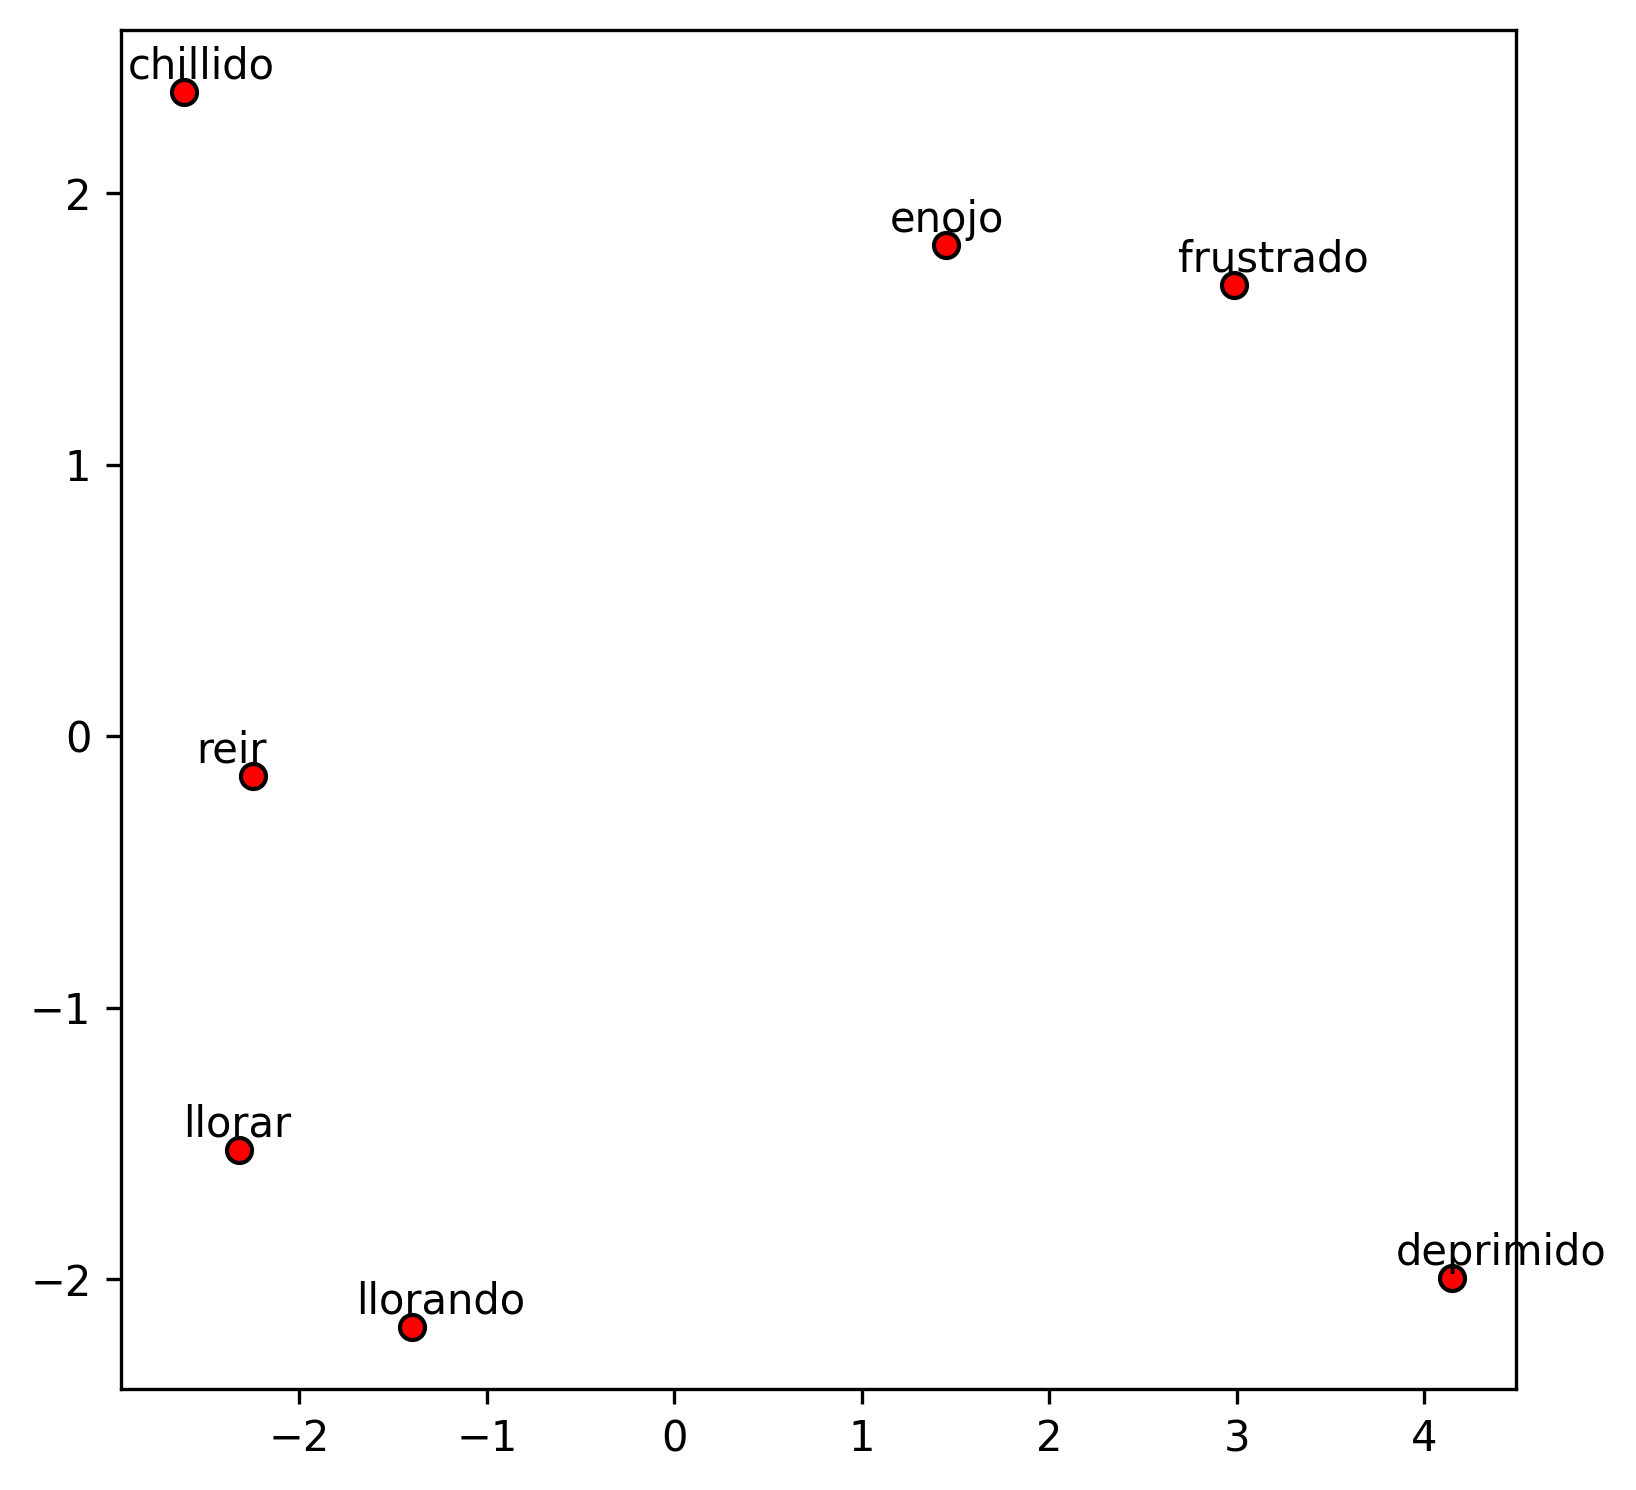

In [19]:
display_pca_scatterplot(model,[("yell", "chillido"), ("frustrated", "frustrado"), 
                               ("depressed", "deprimido"), ("cry", "llorar"), ("laugh", "reir"), ("crying", "llorando"), ("angry","enojo")])